In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from PIL import Image
import tifffile
import napari
from matplotlib import pyplot as plt
from skvideo import io as skvideo_io

In [2]:
import sys
sys.path.append("../src")
from classif_utils import *
from convpaint_utils import *
from dino_utils import *
from ilastik_utils import *
from rf_utils import *
from util_funcs import *

c:\Users\roman\anaconda3\envs\ilastik\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mouse_vid = skvideo_io.vread("../data/deeplabcut_mouse_demo_m3v1mp4.mp4")
mouse_vid.shape

(2330, 480, 640, 3)

In [4]:
img = mouse_vid[0]
# img = img[:,:,0]
img.shape

(480, 640, 3)

In [5]:
v = napari.view_image(img)

In [6]:
# labels = v.layers['Labels'].data
# tifffile.imsave("../data/mouse_vid_labels_frame0.tif", labels.astype(np.uint8))

labels = tifffile.imread("../data/mouse_vid_labels_frame0.tif")
v.add_labels(labels)
print(labels.shape)
print(np.sum(labels > 0))

(480, 640)
1604


## Convpaint

In [7]:
annot_features, targets, model = get_convpaint_features_targets_model(img, labels, layer_list=[0], scalings=[1,2], model_name="vgg16")
print(annot_features.shape)
print(targets.shape)

(1604, 384)
(1604,)


In [8]:
feature_space = get_convpaint_feature_space(img, layer_list=[0], scalings=[1,2], model_name="vgg16")
feature_space.shape

(480, 640, 384)

In [9]:
v.add_image(np.moveaxis(feature_space, -1, 0), name="Feature Space Convpaint")

<Image layer 'Feature Space Convpaint' at 0x1f7092dc4f0>

In [10]:
kmeans = get_kmeans_clusters(feature_space, num_clusters=3, img_shape=None)
kmeans.shape

(480, 640)

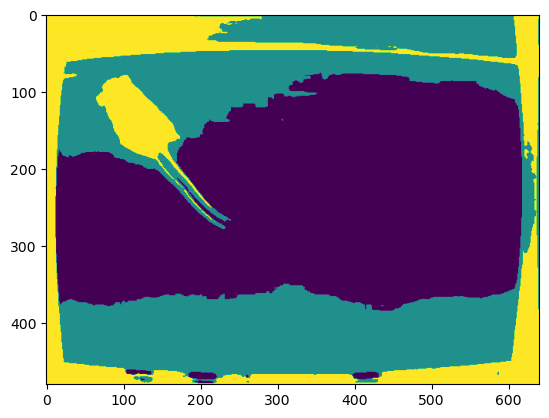

In [11]:
plt.imshow(kmeans)

In [12]:
pc = get_pca_features(feature_space, num_components=2)
print(pc.shape)

(480, 640, 2)


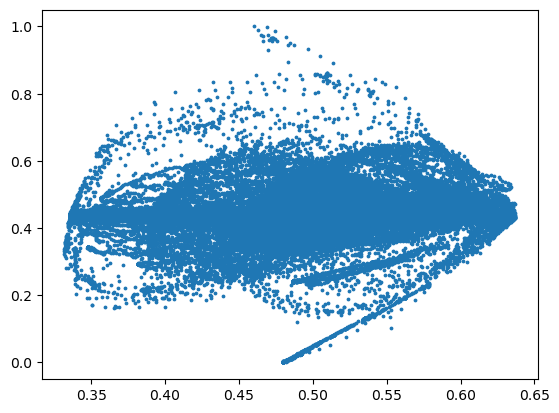

In [13]:
pc_1d = pc.reshape(-1, 2)
plt.scatter(pc_1d[:,0], pc_1d[:,1], s = 3)

In [14]:
kmeans_p = get_kmeans_clusters(pc, num_clusters=3, img_shape=None)
kmeans_p.shape

(480, 640)

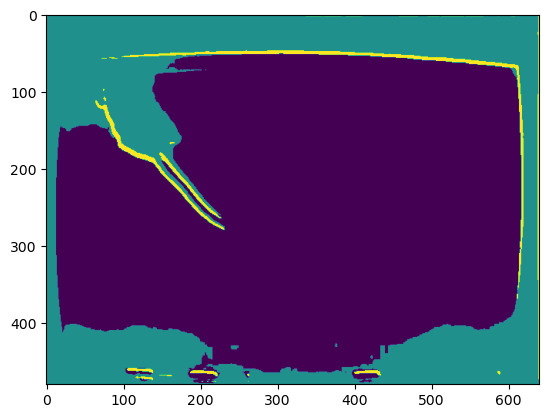

In [15]:
plt.imshow(kmeans_p)

In [16]:
pc_annot = get_pca_features(annot_features, num_components=2)
print(pc_annot.shape)

(1604, 2)


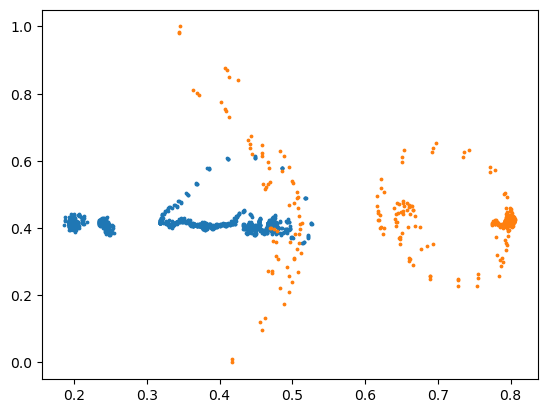

In [17]:
for c in np.unique(targets):
    plt.scatter(pc_annot[targets == c,0], pc_annot[targets == c,1], s = 3)

## DINOv2

In [18]:
patch_features = get_dinov2_patch_features(img)
patch_features.shape

C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


(1610, 384)

In [19]:
feature_space = get_dinov2_feature_space(img, interpolate_features=False)
feature_space.shape

(480, 640, 384)

In [20]:
v.add_image(np.moveaxis(feature_space, -1, 0), name="Feature Space DINOv2")

<Image layer 'Feature Space DINOv2' at 0x1f7150ba130>

In [21]:
pix_features = get_dinov2_pixel_features(img, interpolate_features=False)
pix_features.shape

(307200, 384)

In [22]:
annot_features, targets = get_dinov2_features_targets(img, labels, interpolate_features=False)
print(annot_features.shape)
print(targets.shape)

(1604, 384)
(1604,)


In [23]:
kmeans_f = get_kmeans_clusters(feature_space, num_clusters=3, img_shape=None)
kmeans_f.shape

(480, 640)

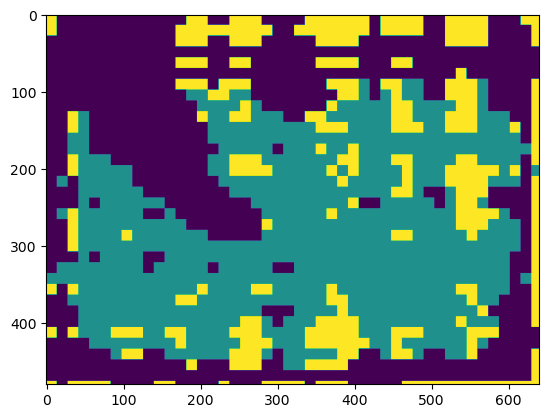

In [24]:
plt.imshow(kmeans_f)

In [25]:
pc = get_pca_features(feature_space, num_components=2)
print(pc.shape)

(480, 640, 2)


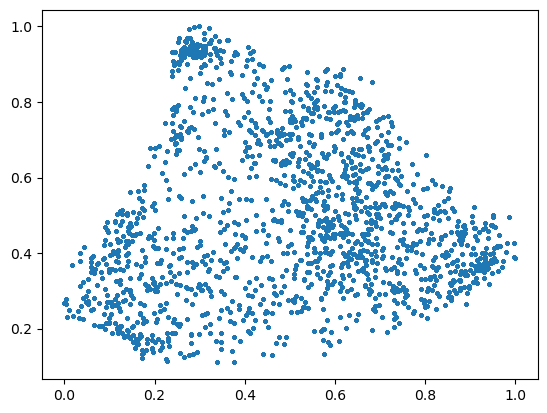

In [26]:
pc_1d = pc.reshape(-1, 2)
plt.scatter(pc_1d[:,0], pc_1d[:,1], s = 3)

In [27]:
kmeans_p = get_kmeans_clusters(pc, num_clusters=3)
kmeans_p.shape

(480, 640)

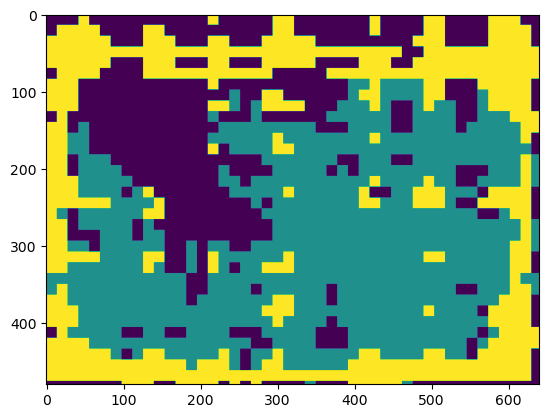

In [28]:
plt.imshow(kmeans_p)

In [29]:
pc_annot = get_pca_features(annot_features, num_components=2)
print(pc_annot.shape)

(1604, 2)


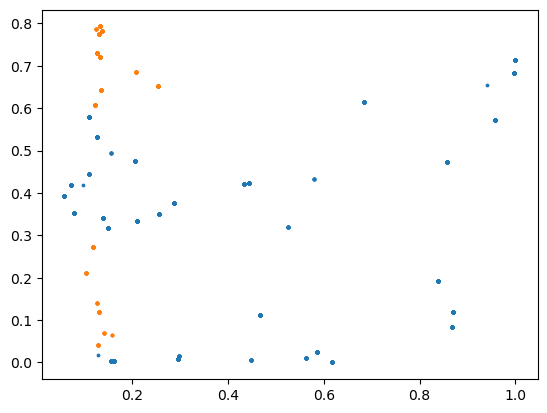

In [30]:
for c in np.unique(targets):
    plt.scatter(pc_annot[targets == c,0], pc_annot[targets == c,1], s = 3)

## Ilastik

In [31]:
feature_space = get_ila_feature_space(img)
feature_space.shape

(480, 640, 168)

In [32]:
annot_features, targets = get_ila_features_targets(img, labels)

In [33]:
v.add_image(np.moveaxis(feature_space, -1, 0), name="Feature Space Ilastik")

<Image layer 'Feature Space Ilastik' at 0x1f715a69c10>

In [34]:
kmeans_f = get_kmeans_clusters(feature_space, num_clusters=3)
kmeans_f.shape

(480, 640)

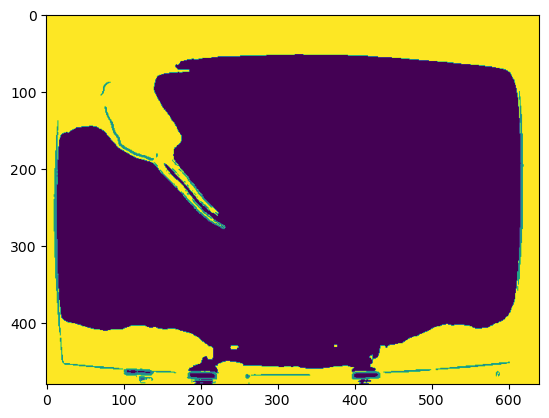

In [35]:
plt.imshow(kmeans_f)

In [36]:
pc = get_pca_features(feature_space, num_components=2)
print(pc.shape)

(480, 640, 2)


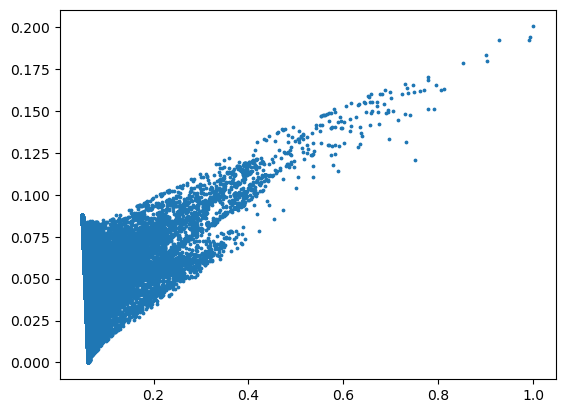

In [37]:
pc_1d = pc.reshape(-1, 2)
plt.scatter(pc_1d[:,0], pc_1d[:,1], s = 3)

In [38]:
kmeans_p = get_kmeans_clusters(pc, num_clusters=3)
kmeans_p.shape

(480, 640)

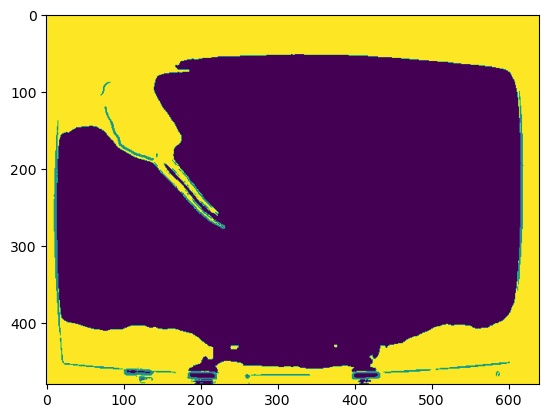

In [39]:
plt.imshow(kmeans_p)

In [40]:
pc_annot = get_pca_features(annot_features, num_components=2)
print(pc_annot.shape)

(1604, 2)


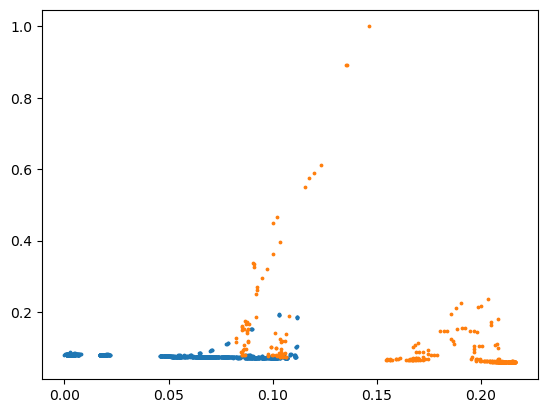

In [41]:
for c in np.unique(targets):
    plt.scatter(pc_annot[targets == c,0], pc_annot[targets == c,1], s = 3)

## Test random forest functions

In [42]:
# features_func_train = get_convpaint_features_targets_model
# features_func_pred = get_convpaint_feature_space
# features_cfg = {"layer_list": [0], "scalings": [1,2], "model_name": "vgg16"}
features_func_train = get_dinov2_features_targets
features_func_pred = get_dinov2_feature_space
# features_func_pred = get_dinov2_pixel_features
# features_func_pred = get_dinov2_patch_features
features_cfg = {"pc": 0}
# features_func_train = get_ila_features_targets
# features_func_pred = get_ila_feature_space
# features_cfg = {}

In [43]:

rf = train_seg_forest([img], [labels], features_func_train, features_cfg, print_steps=True, random_state=0)

Extracting features for labels 1/1 - estimated time left: NA


In [44]:
pred = predict_seg_forest_single_image(img, rf, features_func_pred, features_cfg, pred_per_patch=False, patch_size=(14,14))
print(pred.shape)

(480, 640)


In [45]:
v.add_labels(pred, name="Pred Labels")

<Labels layer 'Pred Labels' at 0x1f71eb494f0>

In [49]:
pred_vid = mouse_vid.copy()
pred_vid = pred_vid[:40:4]

In [50]:
v2 = napari.view_image(pred_vid)

In [51]:
pred_batch = predict_seg_forest(pred_vid, rf, features_func_pred, features_cfg, pred_per_patch=False, patch_size=(14,14), print_steps=True)

Predicting image 1/10 - estimated time left: NA
Predicting image 2/10 - estimated time left: 72.0 seconds
Predicting image 3/10 - estimated time left: 55.5 seconds
Predicting image 4/10 - estimated time left: 42.3 seconds
Predicting image 5/10 - estimated time left: 33.6 seconds
Predicting image 6/10 - estimated time left: 26.7 seconds
Predicting image 7/10 - estimated time left: 20.7 seconds
Predicting image 8/10 - estimated time left: 15.2 seconds
Predicting image 9/10 - estimated time left: 9.9 seconds
Predicting image 10/10 - estimated time left: 4.9 seconds


In [52]:
v2.add_labels(pred_batch)

<Labels layer 'pred_batch' at 0x1f82fb7d670>